# Convergence of upper and lower bound over time

Note that the events in the plot are only based on the upper bound iterations.

In [1]:
import pandas as pd

data = pd.read_json("./05_clean_data.json.zip")
# data = data.drop_duplicates(subset=["instance"])
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0        1272         2980         YASA        t2_m1_null             3.389   
1          96          183         YASA        t2_m1_null             0.252   
2           9           16         YASA        t2_m1_null             0.202   
3         230         1181         YASA        t2_m1_null             0.982   
4         263         1699         YASA        t2_m1_null             1.483   
..        ...          ...          ...               ...               ...   
225        16           33         YASA        t2_m1_null             0.205   
226        10           17         YASA        t2_m1_null             0.202   
227       334           92         YASA        t2_m1_null             0.478   
228      1229         2875         YASA        t2_m1_null             3.433   
229       580          879         YASA        t2_m1_null             1.432   

     baseline_sample_size                  path_to_baseline_sample  \
0                      71  2023-03-01_13-51-03/43_1_7_2_sample.csv   
1                      17  2023-03-01_13-51-03/18_1_7_2_sample.csv   
2                       8   2023-03-01_13-51-03/2_1_7_3_sample.csv   
3                     246  2023-03-01_13-51-03/24_1_7_5_sample.csv   
4                     510  2023-03-01_13-51-03/26_1_7_3_sample.csv   
..                    ...                                      ...   
225                     7   2023-03-01_13-51-03/6_1_7_4_sample.csv   
226                     7   2023-03-01_13-51-03/3_1_7_4_sample.csv   
227                    20  2023-03-01_13-51-03/29_1_7_2_sample.csv   
228                    77  2023-03-01_13-51-03/41_1_7_2_sample.csv   
229                   149  2023-03-01_13-51-03/34_1_7_2_sample.csv   

                                            parameters  \
0    {'func': 'run_samplns', 'args': {'instance_nam...   
1    {'func': 'run_samplns', 'args': {'instance_nam...   
2    {'func': 'run_samplns', 'args': {'instance_nam...   
3    {'func': 'run_samplns', 'args': {'instance_nam...   
4    {'func': 'run_samplns', 'args': {'instance_nam...   
..                                                 ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...   
226  {'func': 'run_samplns', 'args': {'instance_nam...   
227  {'func': 'run_samplns', 'args': {'instance_nam...   
228  {'func': 'run_samplns', 'args': {'instance_nam...   
229  {'func': 'run_samplns', 'args': {'instance_nam...   

                  instance_name  lower_bound  upper_bound  \
0               integrator_arm7           27           47   
1                         axTLS           10           11   
2                           lcm            6            6   
3    fiasco_2017-09-26_11-30-56          223          225   
4    uclibc_2008-06-05_13-46-47          505          505   
..                          ...          ...          ...   
225                         car            5            5   
226                       email            6            6   
227  toybox_2020-12-06_00-02-46            7           14   
228            atlas_mips32_4kc           32           45   
229           WaterlooGenerated           82           82   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 92, 'nbrhd_confs': 4, 'itera...              3.389   
1    [{'nbrhd_tuples': 208, 'nbrhd_confs': 7, 'iter...              0.252   
2    [{'nbrhd_tuples': 37, 'nbrhd_confs': 8, 'itera...              0.202   
3    [{'nbrhd_tuples': 224, 'nbrhd_confs': 20, 'ite...              0.982   
4    [{'nbrhd_tuples': 248, 'nbrhd_confs': 49, 'ite...              1.483   
..                                                 ...                ...   
225  [{'nbrhd_tuples': 77, 'nbrhd_confs': 7, 'itera...              0.205   
226  [{'nbrhd_tuples': 70, 'nbrhd_confs': 7, 'itera...              0.202   
227  [{'nbrhd_tuples': 139, 'nbrhd_confs': 2, 'iter...              0.478   
228  [{'nbrhd_t

In [2]:
from _conf import EXTERNAL_BOUNDS
best_lower_bound = data.groupby(["instance_name"])["lower_bound"].max().reset_index().rename(columns={"lower_bound": "best_lower_bound"})
best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound["internal_best_lower_bound"] = best_lower_bound["best_lower_bound"]
external_best_lb = pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS]).groupby(["instance_name"])["best_lower_bound"].max().reset_index()
best_lower_bound = pd.concat([best_lower_bound, external_best_lb]).groupby(["instance_name"])[["best_lower_bound", "internal_best_lower_bound"]].max().reset_index()
best_lower_bound

instance_name  best_lower_bound  internal_best_lower_bound
0                           APL                 7                        7.0
1                     APL-Model                 8                        8.0
2               BankingSoftware                28                       28.0
3                 BattleofTanks               256                      256.0
4                    ChatClient                 7                        7.0
5                          DMIE                16                       16.0
6                        E-Shop                10                        8.0
7                    EMBToolkit              1872                     1841.0
8                        FameDB                 8                        8.0
9                    FeatureIDE                 7                        7.0
10                FreeBSD-8_0_0                30                       30.0
11                          PPU                12                       12.0
12                     SafeBali                11                       11.0
13                  SortingLine                 9                        9.0
14                     TightVNC                 8                        8.0
15                       Violet                15                       15.0
16            WaterlooGenerated                82                       82.0
17                     XSEngine                32                       31.0
18                     aaed2000                51                       51.0
19                     am31_sim                28                       27.0
20             atlas_mips32_4kc                33                       32.0
21                        axTLS                10                       10.0
22                  berkeleyDB1                15                       15.0
23                  berkeleyDB2                12                       11.0
24               busybox-1_18_0                13                       13.0
25               busybox-1_29_2                21                       21.0
26  busybox_2007-01-24_09-14-09                21                       21.0
27  busybox_2020-12-16_21-53-05                19                       17.0
28                    calculate                 5                        5.0
29                          car                 5                        5.0
30                         dell                31                       31.0
31              eCos-3-0_i386pc                34                       30.0
32                       ea2468                31                       31.0
33                        email                 6                        6.0
34   fiasco_2017-09-26_11-30-56               225                      224.0
35   fiasco_2020-12-01_14-09-14               196                      196.0
36           financial_services              4304                     4164.0
37                fs_2017-05-22               396                      396.0
38                          gpl                16                       16.0
39              integrator_arm7                33                       32.0
40                          lcm                 6                        6.0
41  soletta_2015-06-26_18-38-56                24                       24.0
42   toybox_2006-10-31_23-30-06                 8                        8.0
43   toybox_2020-12-06_00-02-46                 8                        7.0
44   uclibc_2008-06-05_13-46-47               505                      505.0
45   uclibc_2020-12-24_11-54-53               365                      365.0

## Extend the data by some additional information on the best values

In [3]:
# Find the best values for each instance as reference.

# add them to the data as reference
data = data.merge(best_lower_bound, left_on="instance_name", right_on="instance_name")
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0        1272         2980         YASA        t2_m1_null             3.389   
1        1272         2980         YASA        t2_m1_null             3.381   
2        1272         2980         YASA        t2_m1_null             3.392   
3        1272         2980         YASA        t2_m1_null             3.387   
4        1272         2980         YASA        t2_m1_null             3.384   
..        ...          ...          ...               ...               ...   
225      1397        15692         YASA        t2_m1_null            12.087   
226      1397        15692         YASA        t2_m1_null            12.311   
227      1397        15692         YASA        t2_m1_null            12.290   
228      1397        15692         YASA        t2_m1_null            12.269   
229      1397        15692         YASA        t2_m1_null            11.962   

     baseline_sample_size                  path_to_baseline_sample  \
0                      71  2023-03-01_13-51-03/43_1_7_2_sample.csv   
1                      71  2023-03-01_13-51-03/43_1_7_5_sample.csv   
2                      71  2023-03-01_13-51-03/43_1_7_4_sample.csv   
3                      71  2023-03-01_13-51-03/43_1_7_1_sample.csv   
4                      71  2023-03-01_13-51-03/43_1_7_3_sample.csv   
..                    ...                                      ...   
225                    81  2023-03-01_13-51-03/46_1_7_5_sample.csv   
226                    81  2023-03-01_13-51-03/46_1_7_2_sample.csv   
227                    81  2023-03-01_13-51-03/46_1_7_1_sample.csv   
228                    81  2023-03-01_13-51-03/46_1_7_3_sample.csv   
229                    81  2023-03-01_13-51-03/46_1_7_4_sample.csv   

                                            parameters    instance_name  \
0    {'func': 'run_samplns', 'args': {'instance_nam...  integrator_arm7   
1    {'func': 'run_samplns', 'args': {'instance_nam...  integrator_arm7   
2    {'func': 'run_samplns', 'args': {'instance_nam...  integrator_arm7   
3    {'func': 'run_samplns', 'args': {'instance_nam...  integrator_arm7   
4    {'func': 'run_samplns', 'args': {'instance_nam...  integrator_arm7   
..                                                 ...              ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...    FreeBSD-8_0_0   
226  {'func': 'run_samplns', 'args': {'instance_nam...    FreeBSD-8_0_0   
227  {'func': 'run_samplns', 'args': {'instance_nam...    FreeBSD-8_0_0   
228  {'func': 'run_samplns', 'args': {'instance_nam...    FreeBSD-8_0_0   
229  {'func': 'run_samplns', 'args': {'instance_nam...    FreeBSD-8_0_0   

     lower_bound  upper_bound  \
0             27           47   
1             29           47   
2             32           44   
3             27           46   
4             25           43   
..           ...          ...   
225           28           64   
226           24           68   
227           30           63   
228           30           63   
229           28           64   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 92, 'nbrhd_confs': 4, 'itera...              3.389   
1    [{'nbrhd_tuples': 204, 'nbrhd_confs': 6, 'iter...              3.381   
2    [{'nbrhd_tuples': 98, 'nbrhd_confs': 1, 'itera...              3.392   
3    [{'nbrhd_tuples': 104, 'nbrhd_confs': 2, 'iter...              3.387   
4    [{'nbrhd_tuples': 235, 'nbrhd_confs': 7, 'iter...              3.384   
..                                                 ...                ...   
225  [{'nbrhd_tuples': 234, 'nbrhd_confs': 2, 'iter...             12.087   
226  [{'nbrhd_tuples': 216, 'nbrhd_confs': 5, 'iter...             12.311   
227  [{'nbrhd_tuples': 239, 'nbrhd_confs': 5, 'iter...             12.290   
228  [{'nbrhd_tuples': 233, 'nbrhd_confs': 9, 'iter...             12.269   
229  [{'nbrhd_tuples': 232, 'nbrhd_confs': 9, 'iter...             11.

## A look onto the data never hurts

In [4]:
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0        1272         2980         YASA        t2_m1_null             3.389   
1        1272         2980         YASA        t2_m1_null             3.381   
2        1272         2980         YASA        t2_m1_null             3.392   
3        1272         2980         YASA        t2_m1_null             3.387   
4        1272         2980         YASA        t2_m1_null             3.384   
..        ...          ...          ...               ...               ...   
225      1397        15692         YASA        t2_m1_null            12.087   
226      1397        15692         YASA        t2_m1_null            12.311   
227      1397        15692         YASA        t2_m1_null            12.290   
228      1397        15692         YASA        t2_m1_null            12.269   
229      1397        15692         YASA        t2_m1_null            11.962   

     baseline_sample_size                  path_to_baseline_sample  \
0                      71  2023-03-01_13-51-03/43_1_7_2_sample.csv   
1                      71  2023-03-01_13-51-03/43_1_7_5_sample.csv   
2                      71  2023-03-01_13-51-03/43_1_7_4_sample.csv   
3                      71  2023-03-01_13-51-03/43_1_7_1_sample.csv   
4                      71  2023-03-01_13-51-03/43_1_7_3_sample.csv   
..                    ...                                      ...   
225                    81  2023-03-01_13-51-03/46_1_7_5_sample.csv   
226                    81  2023-03-01_13-51-03/46_1_7_2_sample.csv   
227                    81  2023-03-01_13-51-03/46_1_7_1_sample.csv   
228                    81  2023-03-01_13-51-03/46_1_7_3_sample.csv   
229                    81  2023-03-01_13-51-03/46_1_7_4_sample.csv   

                                            parameters    instance_name  \
0    {'func': 'run_samplns', 'args': {'instance_nam...  integrator_arm7   
1    {'func': 'run_samplns', 'args': {'instance_nam...  integrator_arm7   
2    {'func': 'run_samplns', 'args': {'instance_nam...  integrator_arm7   
3    {'func': 'run_samplns', 'args': {'instance_nam...  integrator_arm7   
4    {'func': 'run_samplns', 'args': {'instance_nam...  integrator_arm7   
..                                                 ...              ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...    FreeBSD-8_0_0   
226  {'func': 'run_samplns', 'args': {'instance_nam...    FreeBSD-8_0_0   
227  {'func': 'run_samplns', 'args': {'instance_nam...    FreeBSD-8_0_0   
228  {'func': 'run_samplns', 'args': {'instance_nam...    FreeBSD-8_0_0   
229  {'func': 'run_samplns', 'args': {'instance_nam...    FreeBSD-8_0_0   

     lower_bound  upper_bound  \
0             27           47   
1             29           47   
2             32           44   
3             27           46   
4             25           43   
..           ...          ...   
225           28           64   
226           24           68   
227           30           63   
228           30           63   
229           28           64   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 92, 'nbrhd_confs': 4, 'itera...              3.389   
1    [{'nbrhd_tuples': 204, 'nbrhd_confs': 6, 'iter...              3.381   
2    [{'nbrhd_tuples': 98, 'nbrhd_confs': 1, 'itera...              3.392   
3    [{'nbrhd_tuples': 104, 'nbrhd_confs': 2, 'iter...              3.387   
4    [{'nbrhd_tuples': 235, 'nbrhd_confs': 7, 'iter...              3.384   
..                                                 ...                ...   
225  [{'nbrhd_tuples': 234, 'nbrhd_confs': 2, 'iter...             12.087   
226  [{'nbrhd_tuples': 216, 'nbrhd_confs': 5, 'iter...             12.311   
227  [{'nbrhd_tuples': 239, 'nbrhd_confs': 5, 'iter...             12.290   
228  [{'nbrhd_tuples': 233, 'nbrhd_confs': 9, 'iter...             12.269   
229  [{'nbrhd_tuples': 232, 'nbrhd_confs': 9, 'iter...             11.

The data field `iteration_info` contains a list of dicts for each iteration. This dict looks as follows:
```
{ 'nbrhd_tuples': 166,  # the tuples to be covered in this iteration
  'nbrhd_confs': 5,     # the number of configurations deleted from the sample
  'iteration': 0,       # the number of the iteration, in this case the first iteration
  'lb': 3.0,            # the current best lb (global)
  'ub': 23,             # the current best ub (global)
  'time': 1.0297019481658936,    # overall time at the end of this iteration
  'iteration_time': 0.48791050910949707,   # time in this iteration
  'events': [[0.0350489616394043, 'neighborhood_selected'],   # times of events in this iteration. Good for finding the culprit of long runtimes.
   [0.24133801460266113, 'local_cds_computed'],
   [0.29517436027526855, 'model_built'],
   [0.48662543296813965, 'model_optimized'],
   [0.48789548873901367, 'neighborhood_optimized'],
   [0.48791003227233887, 'global_lb_iteration_finished']]}
```

In [5]:
instance_infos = (
    data[["instance_name", "num_vars", "num_clauses"]]
    .drop_duplicates()
    .sort_values(by=[ "num_vars", "num_clauses"])
)
instance_infos

instance_name  num_vars  num_clauses
50                     calculate         9           15
10                           lcm         9           16
95                         email        10           17
140                   ChatClient        14           20
200   toybox_2006-10-31_23-30-06        16           13
80                           car        16           33
35                    FeatureIDE        19           27
170                       FameDB        22           40
60                           APL        23           35
105                     SafeBali        24           45
180                     TightVNC        28           39
120                    APL-Model        28           40
160                          gpl        38           99
125                  SortingLine        39           77
175                         dell        46          244
40                           PPU        52          109
165                  berkeleyDB1        76          147
5                          axTLS        96          183
45                        Violet       101          203
65                   berkeleyDB2       119          346
55   soletta_2015-06-26_18-38-56       129          192
190                BattleofTanks       144          769
100              BankingSoftware       176          280
15    fiasco_2017-09-26_11-30-56       230         1181
185   fiasco_2020-12-01_14-09-14       258         1542
20    uclibc_2008-06-05_13-46-47       263         1699
150   uclibc_2020-12-24_11-54-53       272         1670
215                       E-Shop       326          499
110   toybox_2020-12-06_00-02-46       334           92
30                          DMIE       366          627
205  busybox_2007-01-24_09-14-09       540          429
145                fs_2017-05-22       557         4992
85             WaterlooGenerated       580          879
220           financial_services       771         7238
135               busybox-1_18_0       854         1164
130               busybox-1_29_2      1018          997
210  busybox_2020-12-16_21-53-05      1050          996
155                     am31_sim      1178         2747
115                   EMBToolkit      1179         5414
195             atlas_mips32_4kc      1229         2875
75               eCos-3-0_i386pc      1245         3723
0                integrator_arm7      1272         2980
70                      XSEngine      1273         2942
90                      aaed2000      1298         3036
225                FreeBSD-8_0_0      1397        15692
25                        ea2468      1408         3319

## Extract the iteration data from each optimization

Bring them in a format that can easily be plotted by seaborn.

In [6]:
import pandas as pd


# Collect the data from the iteration_info events.
class EventCollector:
    def __init__(self):
        self.events = {
            "time": [],
            "val": [],
            "type": [],
            "instance": [],
            "path": [],
            #"alg": [],
            "initial_sample_size": [],
            "y": [],
            "final": [],
        }

    def __call__(self, row):
        it_data = row["iteration_info"]

        def add(val, lbub, time, final=False):
            if time > 900:
                return
            self.events["time"].append((time+row["time_used_by_yasa"]) / 60)
            self.events["val"].append(val)
            self.events["type"].append(lbub)
            self.events["instance"].append(row["instance_name"])
            #self.events["alg"].append(row["baseline_alg"])
            self.events["path"].append(row["path_to_baseline_sample"])
            self.events["initial_sample_size"].append(row["baseline_sample_size"])
            self.events["y"].append(100 * (val / row["best_lower_bound"]))
            self.events["final"].append(final)

        # add a zero entry
        add(0, "Lower", 0)
        add(row["baseline_sample_size"], "Upper", 0)
        for event in it_data:
            add(
                event["lb"],
                "Lower",
                event["time"],
                final=event["lb"] == row["lower_bound"],
            )
            add(
                event["ub"],
                "Upper",
                event["time"],
                final=event["ub"] == row["upper_bound"],
            )


ec = EventCollector()
data.sort_values(
    by=["num_vars", "num_clauses"]
).apply(ec, axis=1)
t = pd.DataFrame(ec.events)

In [7]:
t

time   val   type   instance  \
0       0.003317   0.0  Lower  calculate   
1       0.003317  10.0  Upper  calculate   
2       0.004367   5.0  Lower  calculate   
3       0.004367   5.0  Upper  calculate   
4       0.003567   0.0  Lower  calculate   
...          ...   ...    ...        ...   
12743  13.959677  47.0  Upper     ea2468   
12744  14.617693  21.0  Lower     ea2468   
12745  14.617693  47.0  Upper     ea2468   
12746  15.030581  21.0  Lower     ea2468   
12747  15.030581  47.0  Upper     ea2468   

                                          path  initial_sample_size  \
0       2023-03-01_13-51-03/1_1_7_4_sample.csv                   10   
1       2023-03-01_13-51-03/1_1_7_4_sample.csv                   10   
2       2023-03-01_13-51-03/1_1_7_4_sample.csv                   10   
3       2023-03-01_13-51-03/1_1_7_4_sample.csv                   10   
4       2023-03-01_13-51-03/1_1_7_1_sample.csv                   10   
...                                        ...                  ...   
12743  2023-03-01_13-51-03/47_1_7_3_sample.csv                   72   
12744  2023-03-01_13-51-03/47_1_7_3_sample.csv                   72   
12745  2023-03-01_13-51-03/47_1_7_3_sample.csv                   72   
12746  2023-03-01_13-51-03/47_1_7_3_sample.csv                   72   
12747  2023-03-01_13-51-03/47_1_7_3_sample.csv                   72   

                y  final  
0        0.000000  False  
1      200.000000  False  
2      100.000000   True  
3      100.000000   True  
4        0.000000  False  
...           ...    ...  
12743  151.612903   True  
12744   67.741935   True  
12745  151.612903   True  
12746   67.741935   True  
12747  151.612903   True  

[12748 rows x 8 columns]

## Feature Models on which SampLNS did not finish a single iteration in time

These models have very large initial samples (more than a thousand configurations), for which the current implementation is not equipped.
The problem lies more in the data structures than the actual approach.
They should be feasible with some extra effort in making those data structures more efficient.

*A lower bound is still computed for these instances, but without iterations of SampLNS, only the final lower bound is saved after SampLNS aborted.*

In [8]:
t_ = t.groupby(["instance", "path"])["time"].max().reset_index()
unsolved_instances = t_[t_["time"] == 0]["instance"].unique().tolist()
unsolved_instances

[]

## Plot the convergence for all other models.

In [9]:
solved_instances = [
    x for x in instance_infos["instance_name"].tolist() if x not in unsolved_instances
]

In [10]:
# Prepare plotting
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt

In [11]:
def plot_lb_ub_progress(data, axis, xmax=16, single_instance=False):
    instance_descr = "Model"
    bound_descr = "Bound"
    t_ = data.rename(columns={"instance": instance_descr, "type": bound_descr})
    if single_instance:
        sns.lineplot(
            data=t_,
            ax=axis,
            x="time",
            y="y",
            style=bound_descr,
            hue="path",
            units="path",
            estimator=None,
            markers=False,
            palette="tab10",
            drawstyle="steps-post",
            dashes=[(1.5, 1.5), (3, 3)],
            legend=False,
        )
        sns.scatterplot(
            data=t_[t_[bound_descr] == "Upper"],
            ax=axis,
            x="time",
            y="y",
            hue="path",
            marker="X",
            palette="tab10",
            legend=False,
        )
    else:
        sns.lineplot(
            data=t_,
            ax=axis,
            x="time",
            y="y",
            style=bound_descr,
            hue=instance_descr,
            units="path",
            estimator=None,
            markers=False,
            palette="tab10",
            drawstyle="steps-post",
            dashes=[(1.5, 1.5), (3, 3)],
        )
        sns.scatterplot(
            data=t_[t_[bound_descr] == "Upper"],
            ax=axis,
            x="time",
            y="y",
            hue=instance_descr,
            marker="X",
            palette="tab10",
            legend=False,
        )
    axis.set_xlim(-0.1, xmax)
    axis.set_xlabel("Time in (min)")
    axis.set_ylabel("Relative to best lower bound (%)")
    if single_instance:
        axis.set_title(
            f"Convergence of upper and lower bound - {data['instance'].tolist()[0]}"
        )
    else:
        axis.set_title("Convergence of upper and lower bound")

### All models in one plot

This shows us that most models really make quick progress and only a few take a little longer.

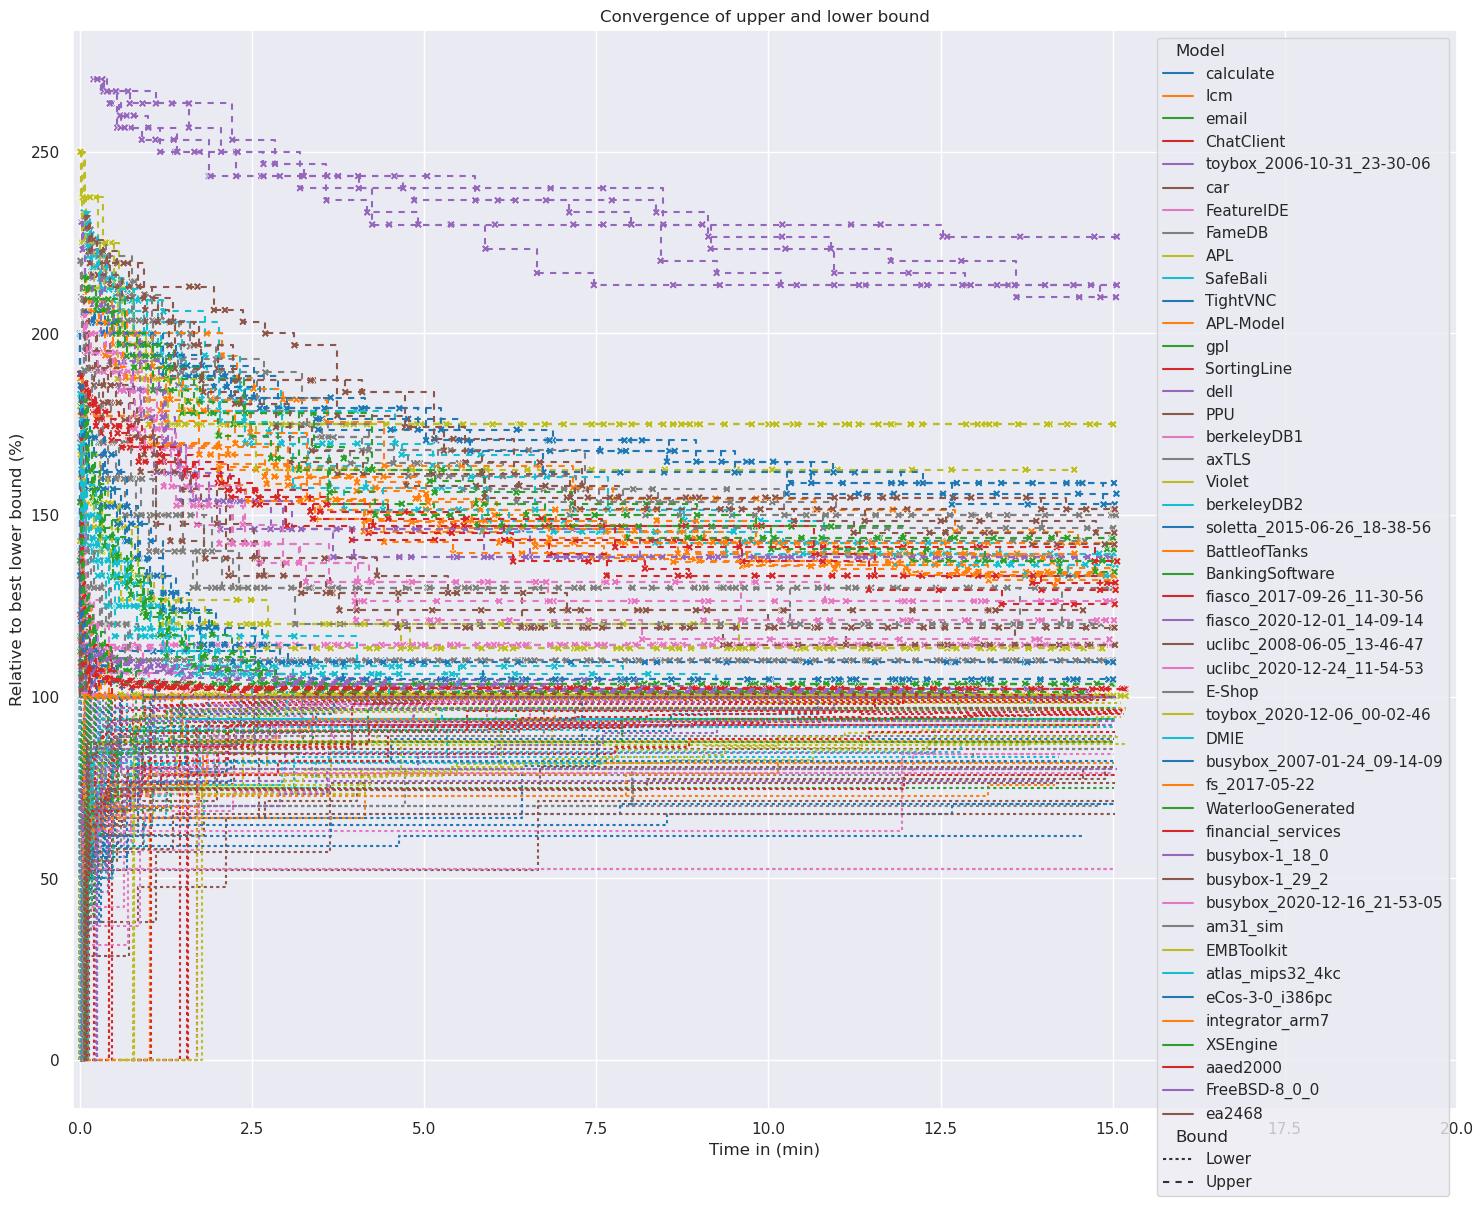

In [12]:
plt.figure(figsize=(15, 13))
plot_lb_ub_progress(t[t["instance"].isin(solved_instances)], plt.gca(), xmax=20)
plt.tight_layout()
plt.show()

### Every model with all its five runs.

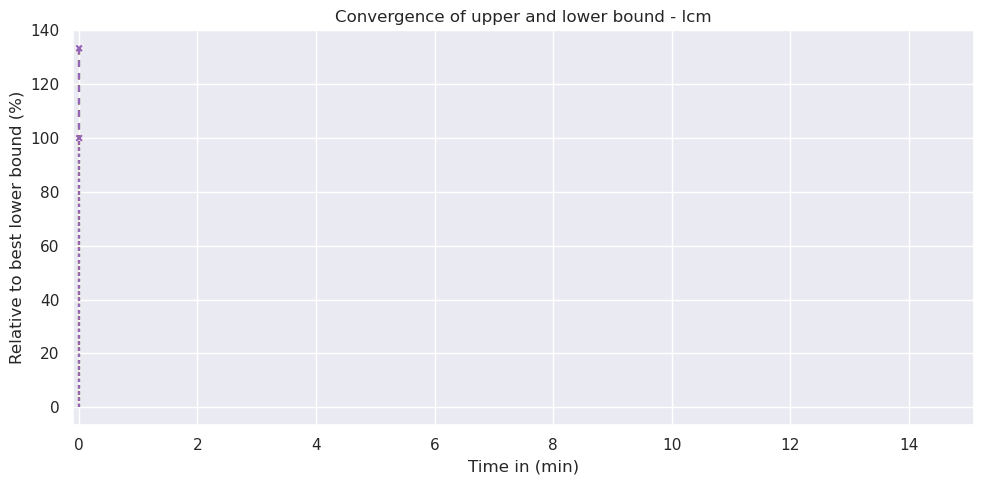

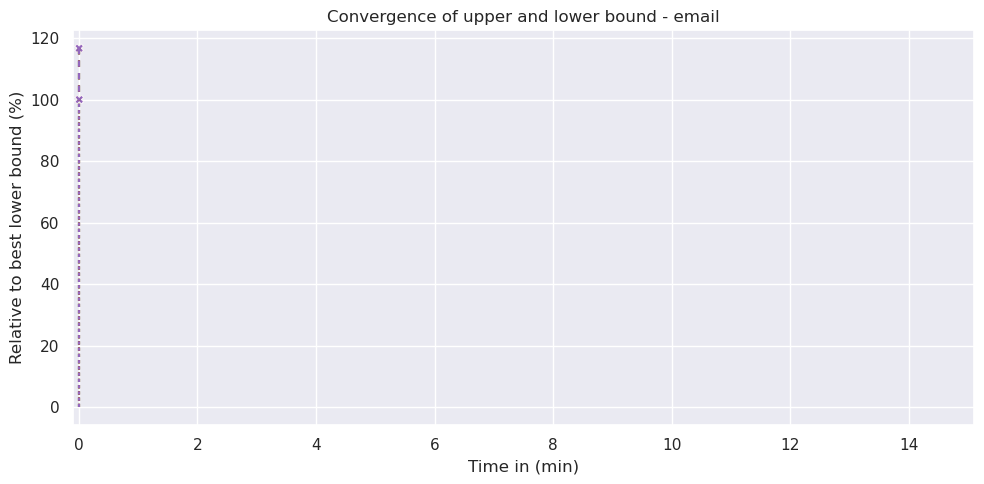

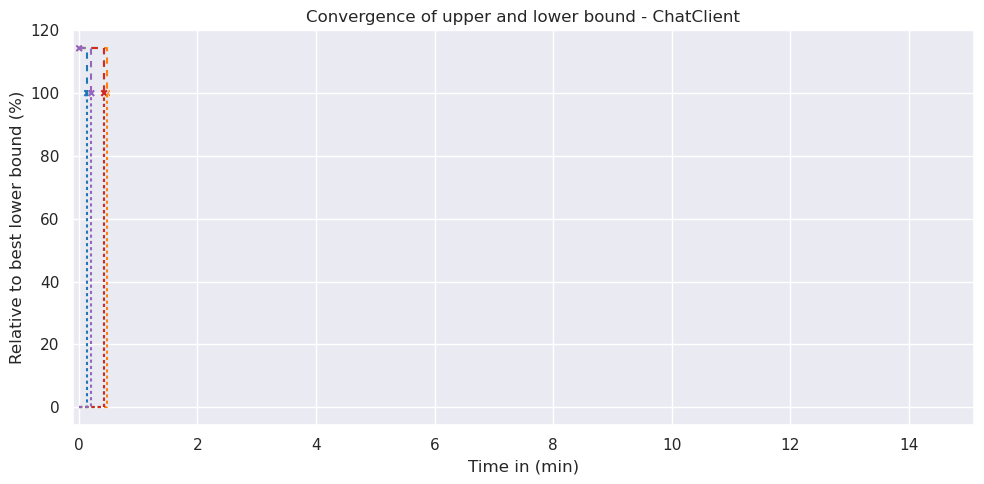

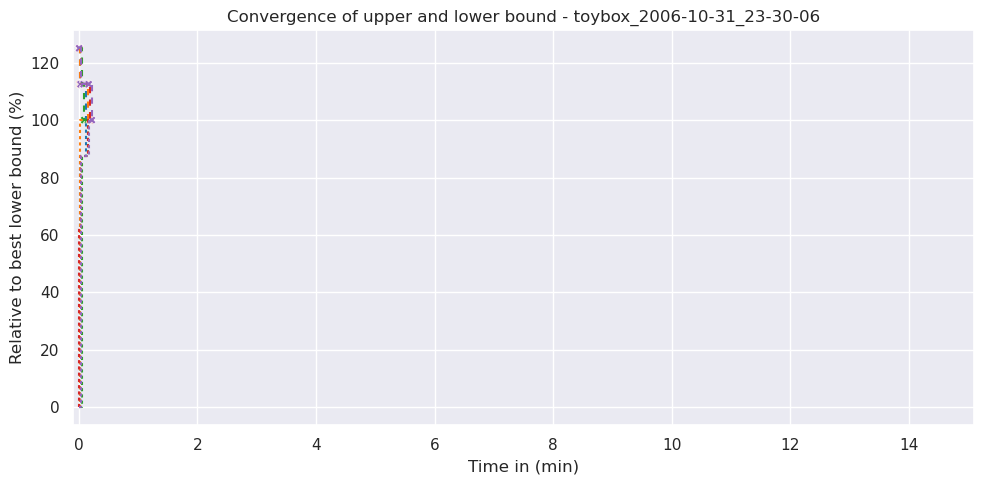

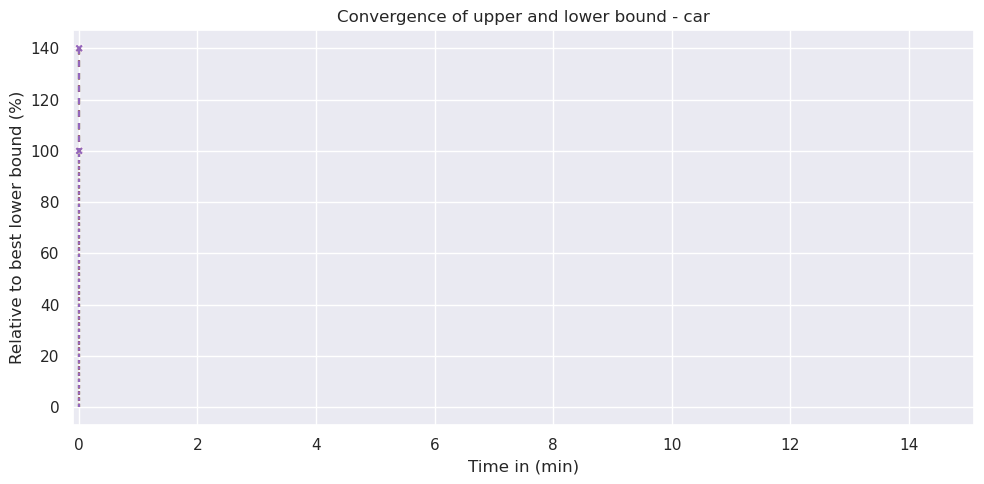

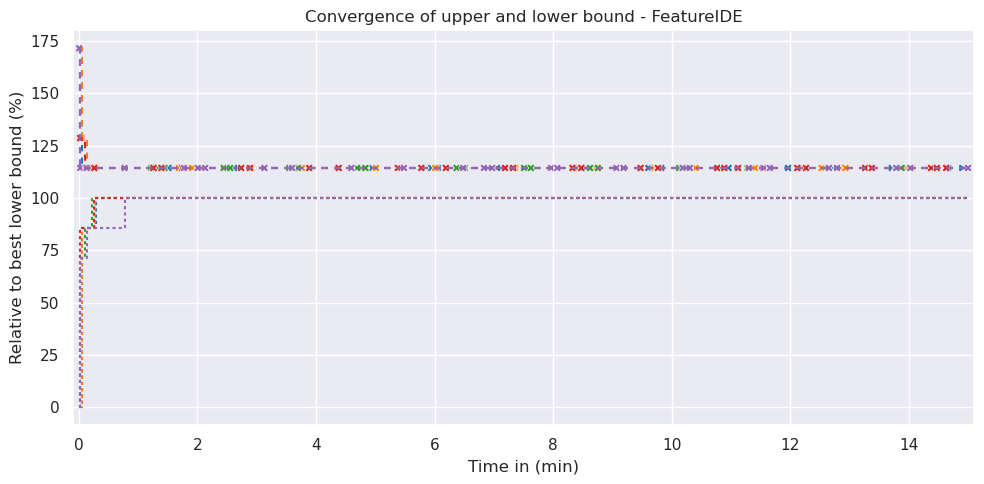

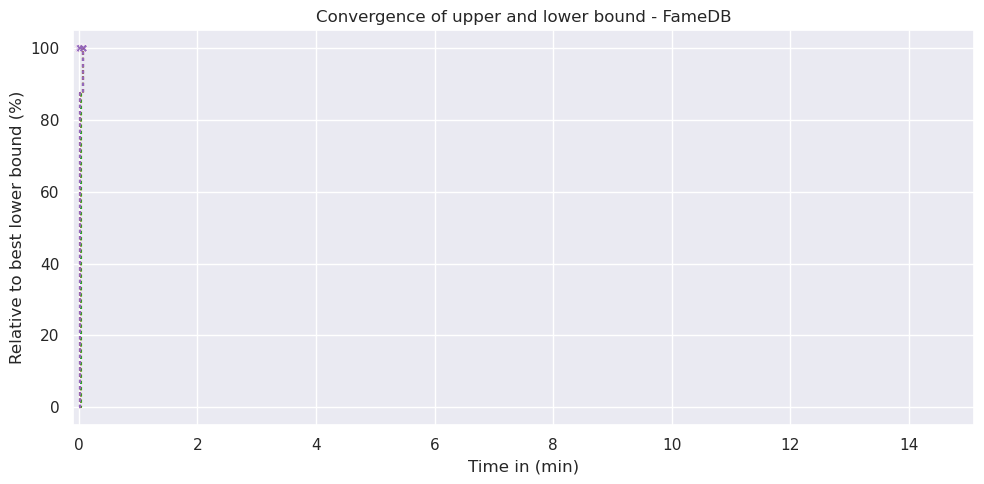

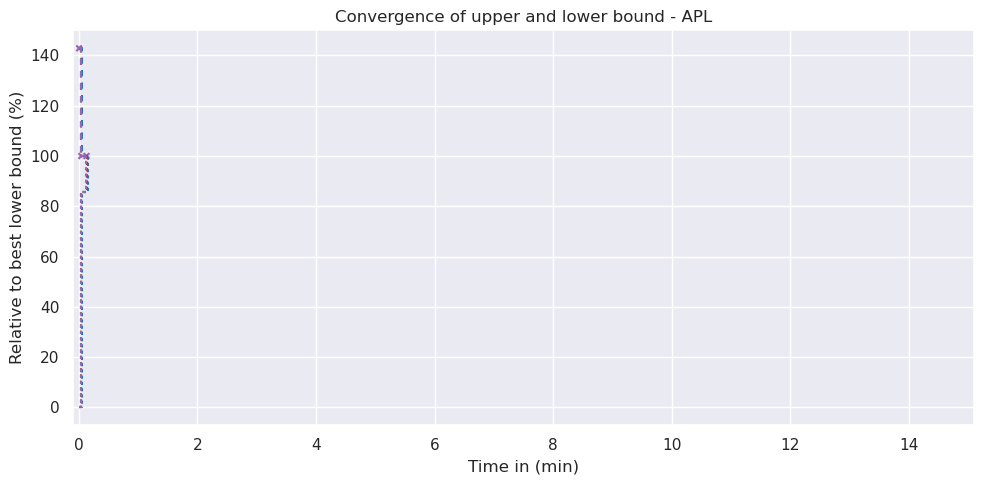

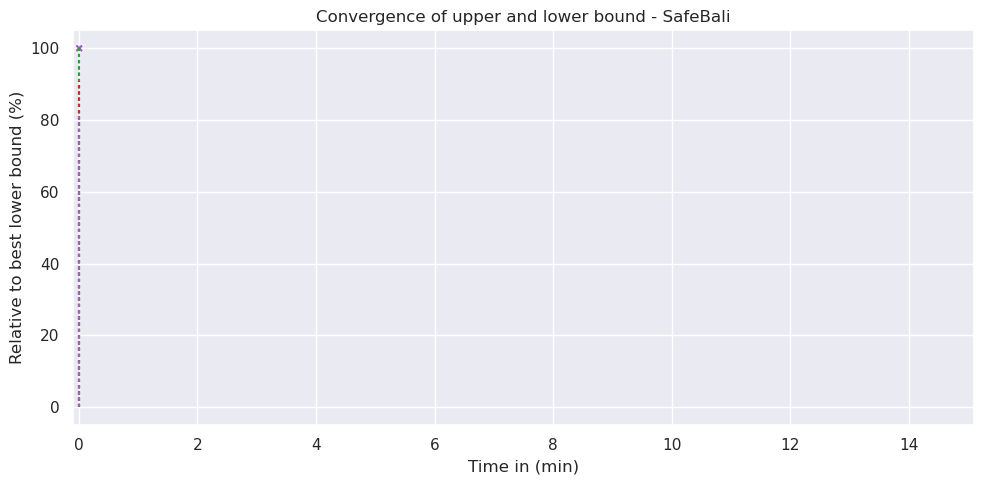

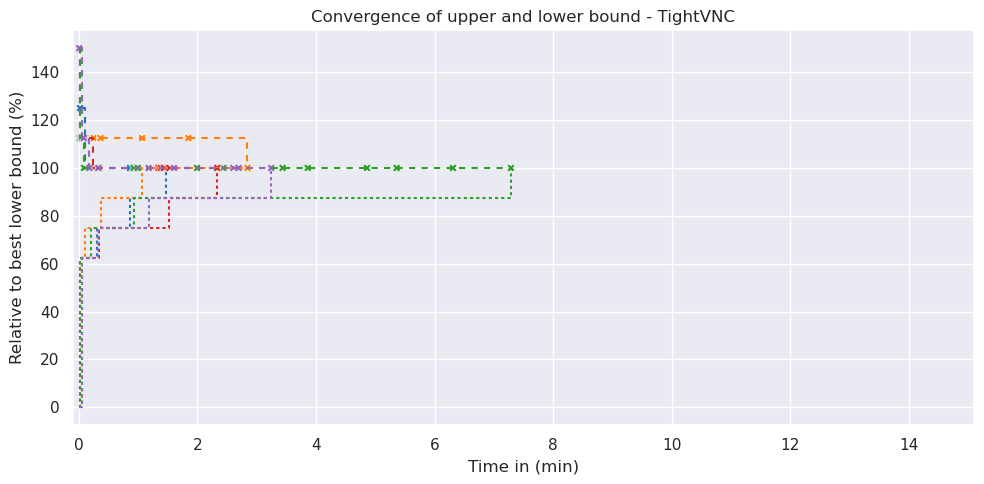

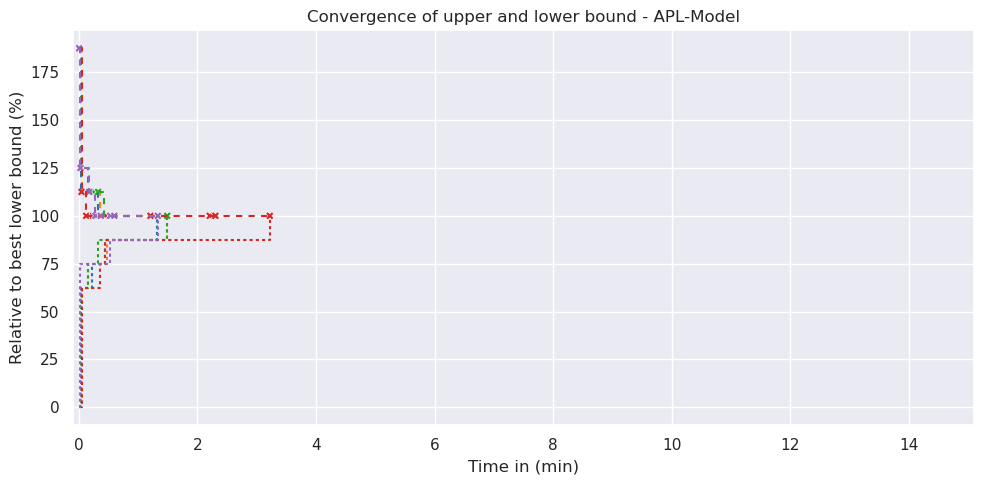

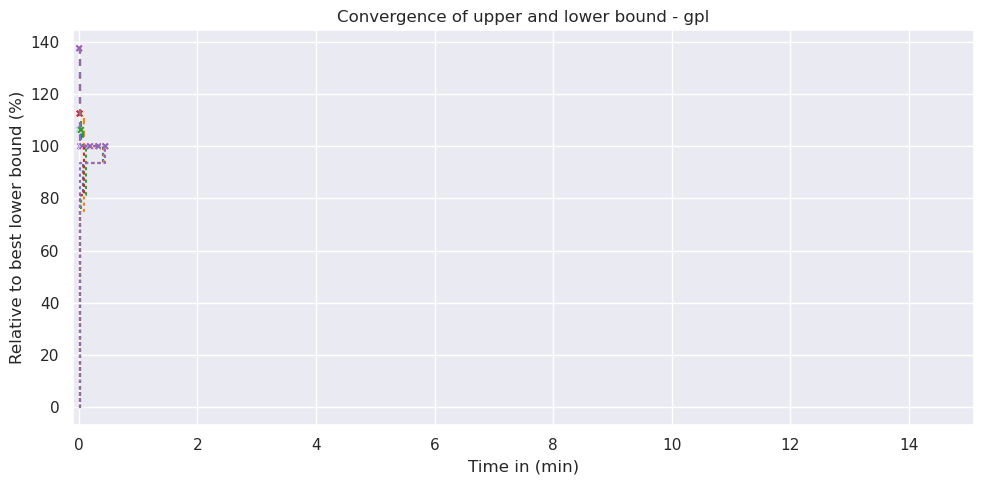

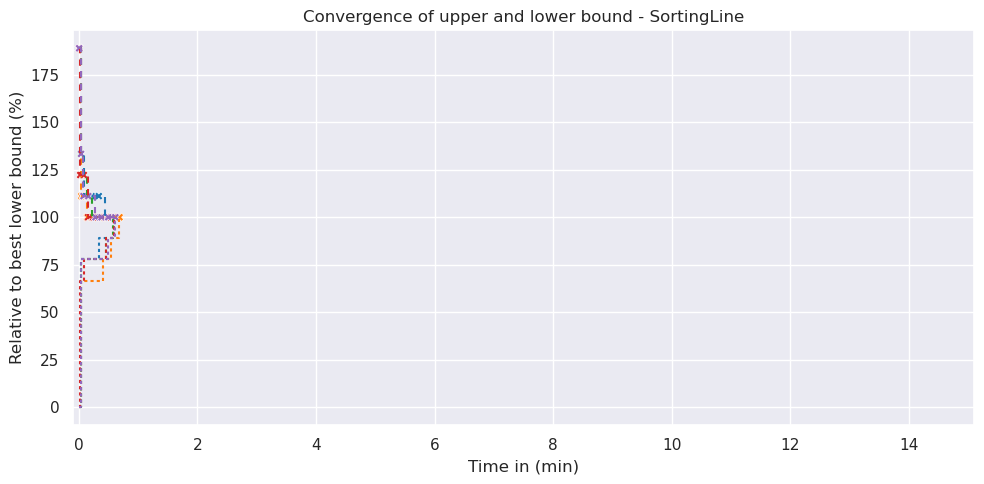

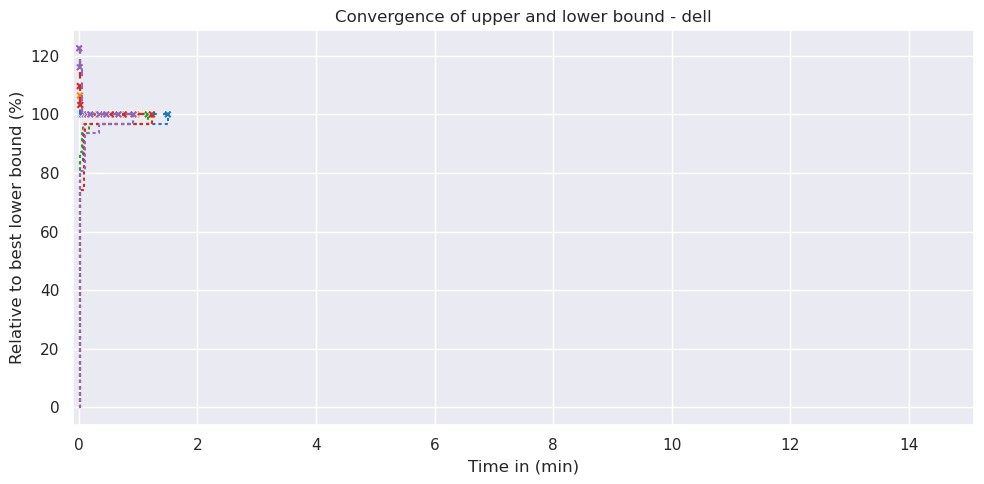

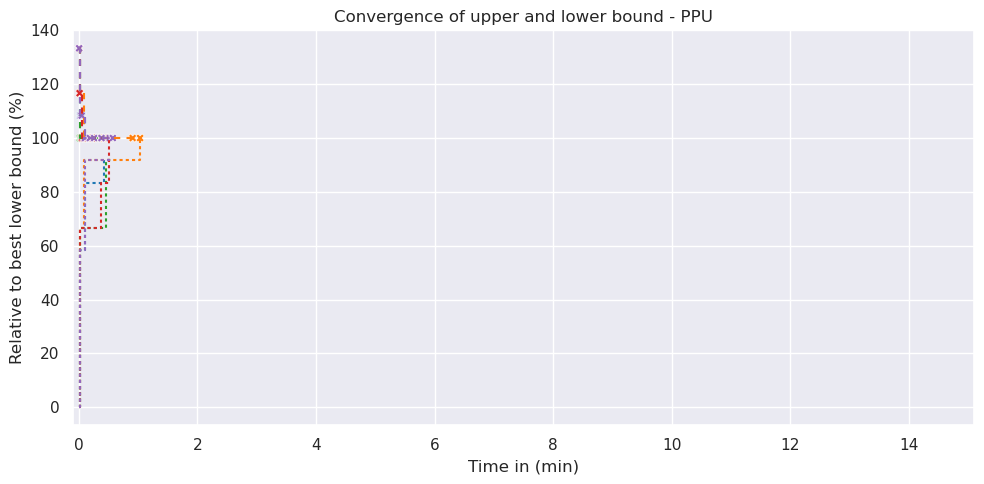

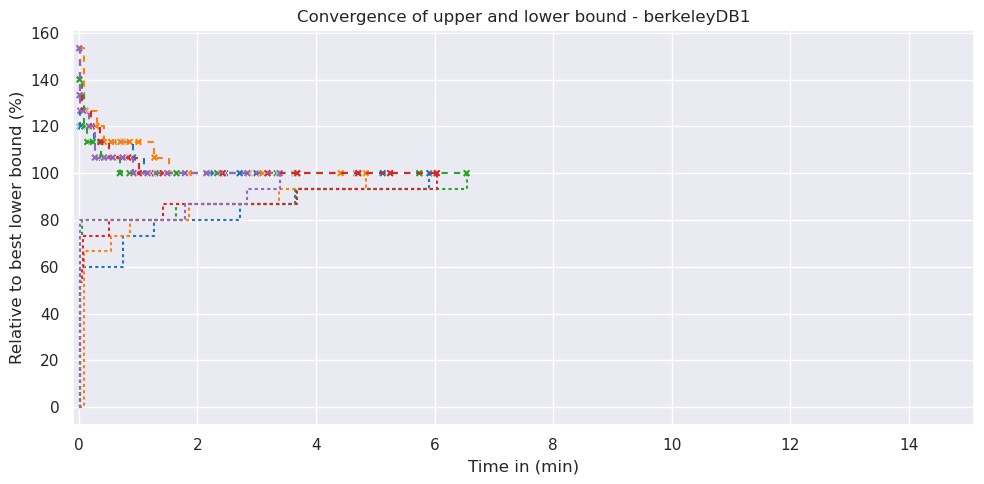

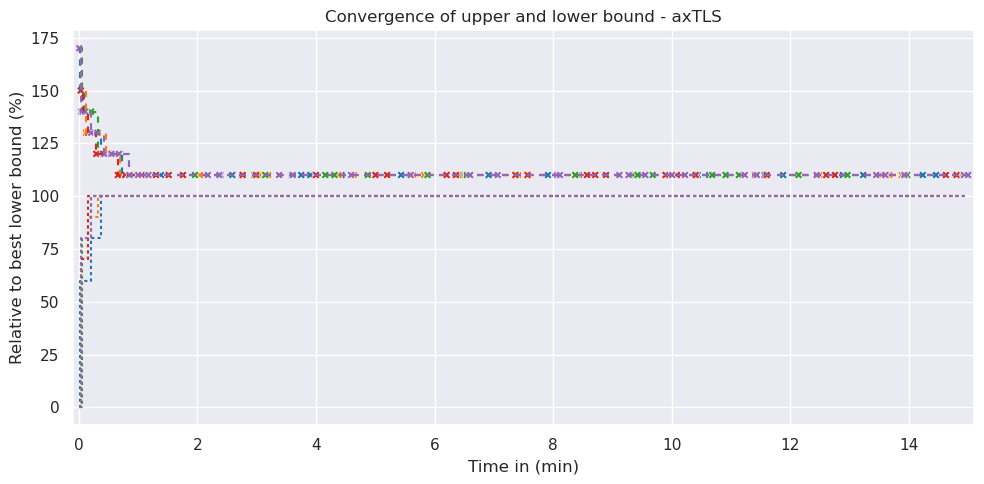

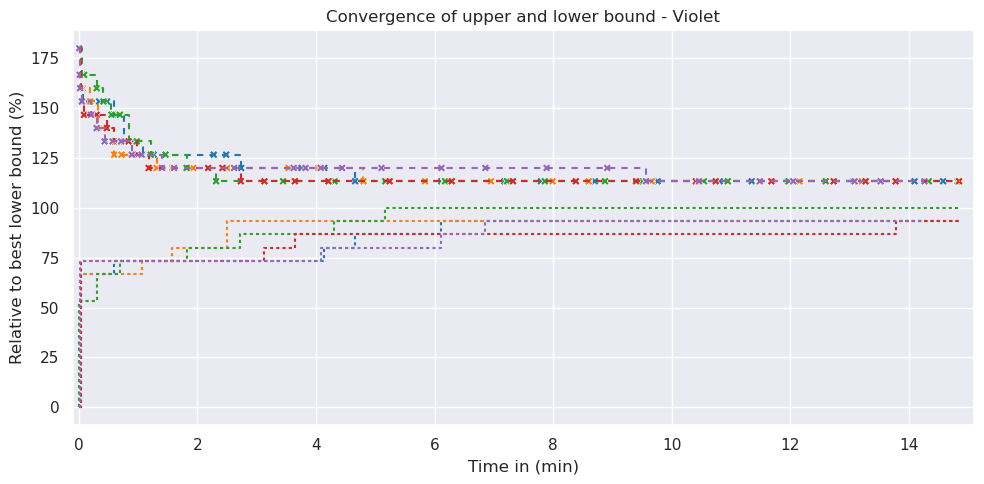

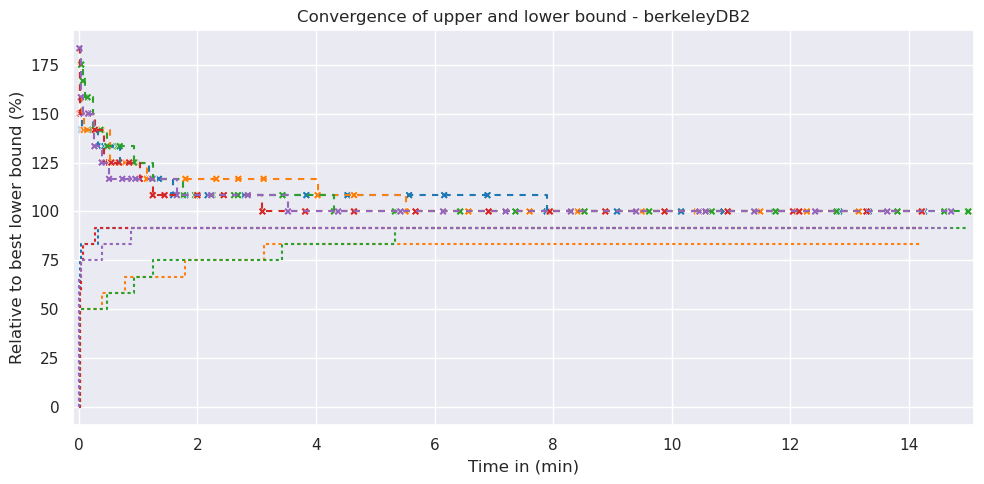

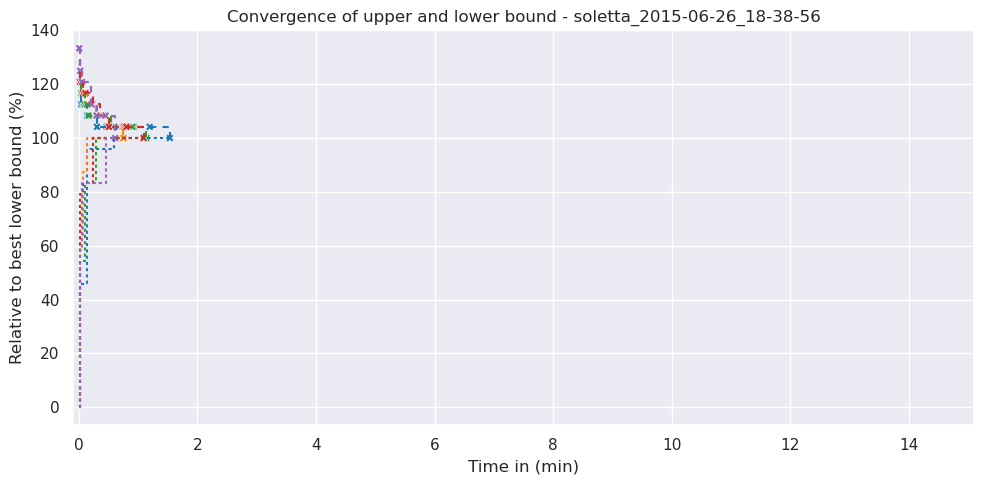

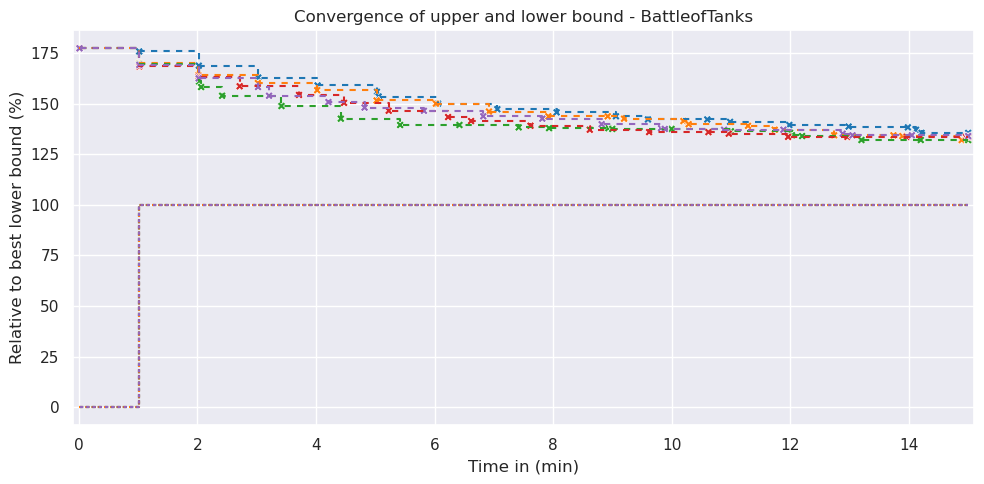

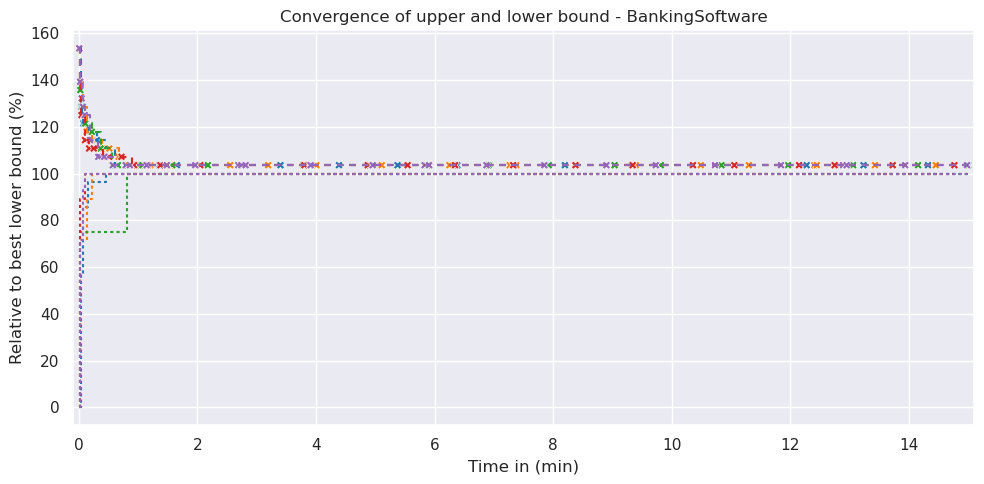

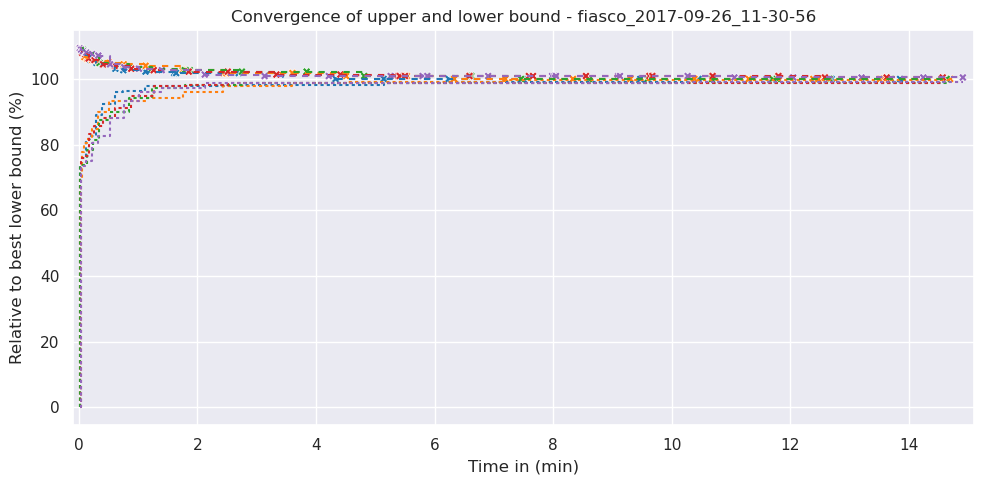

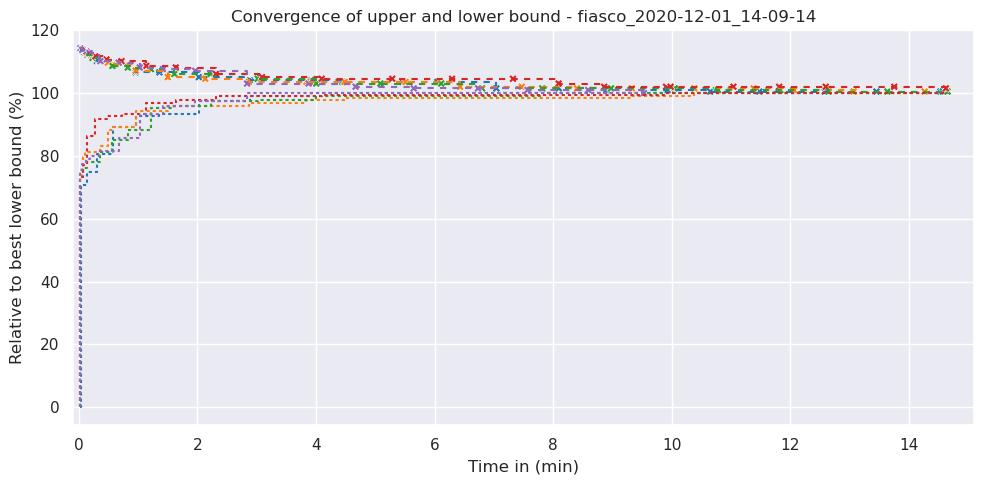

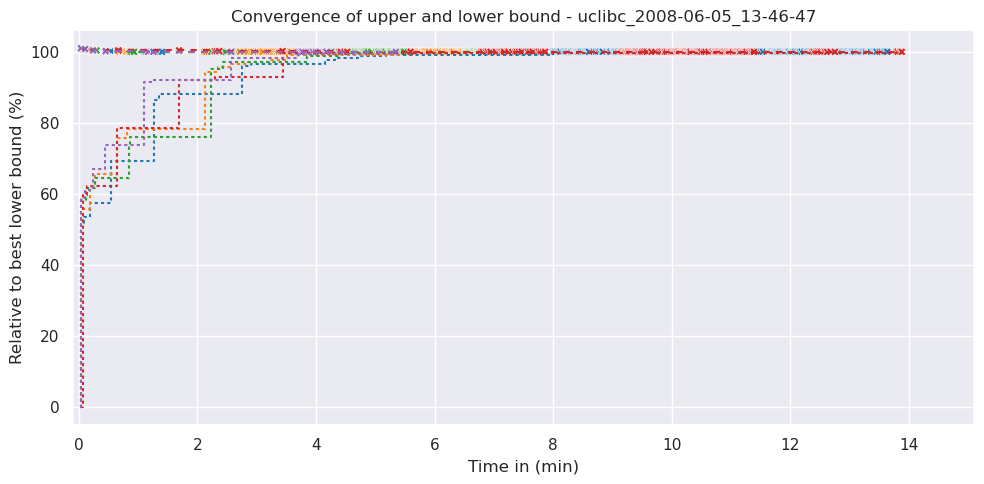

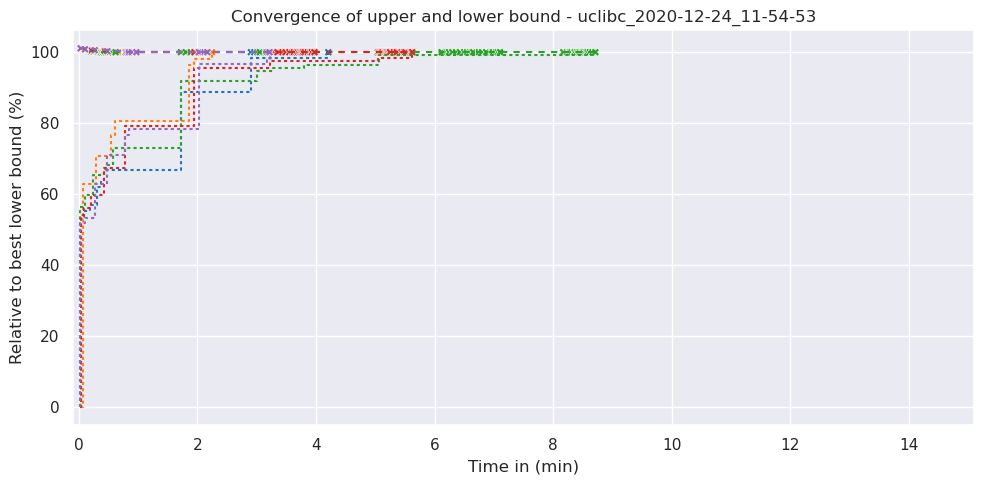

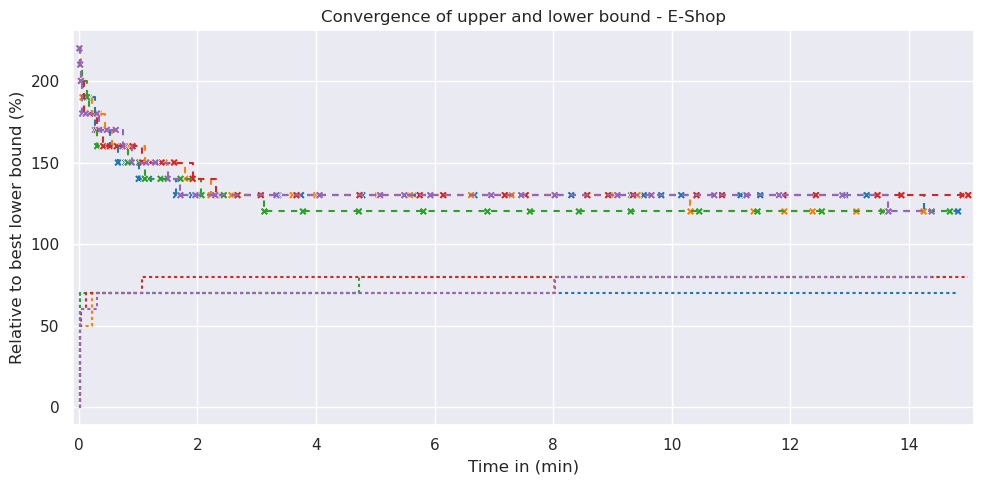

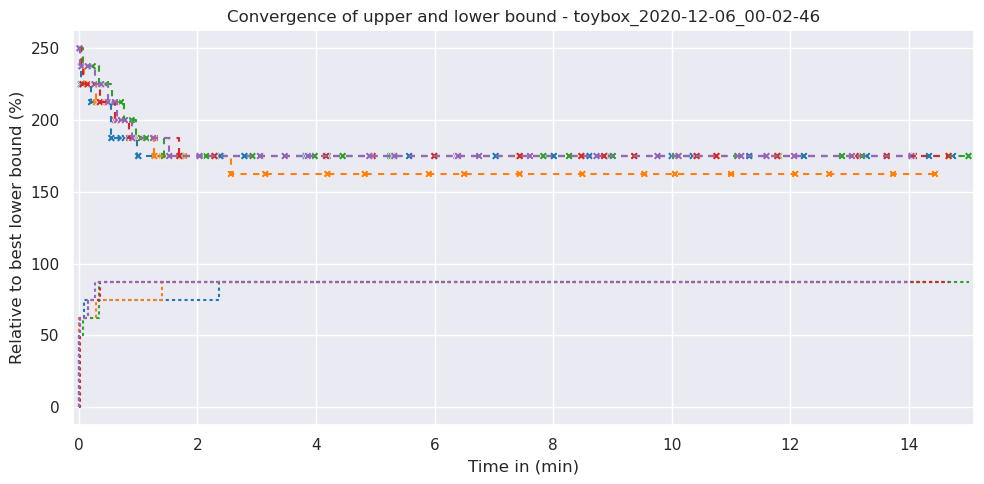

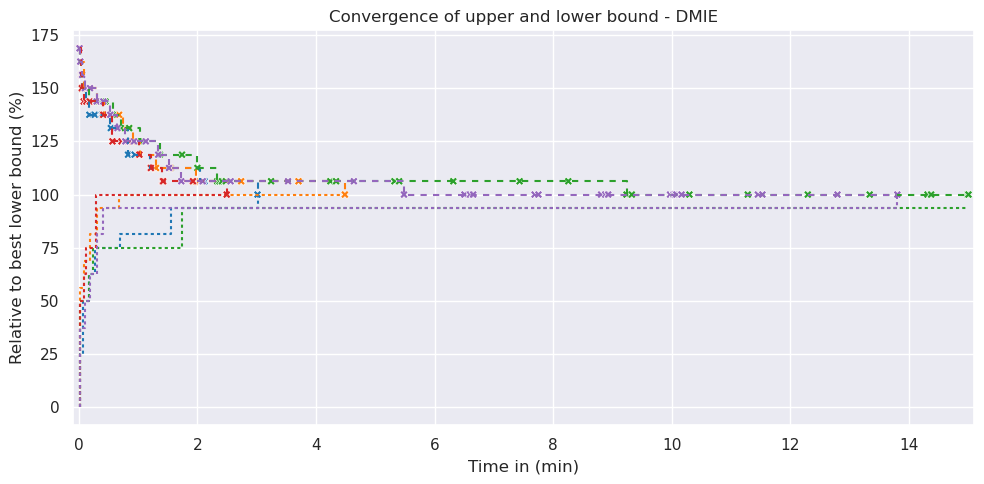

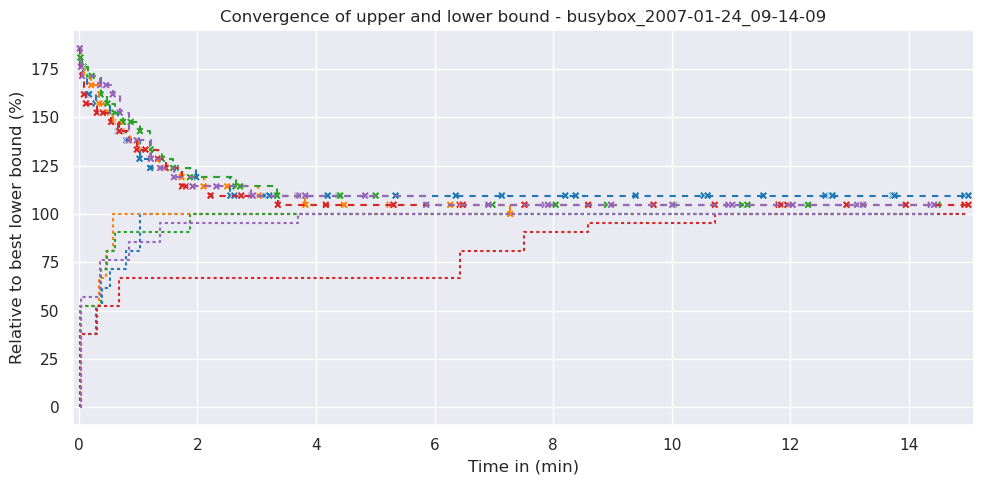

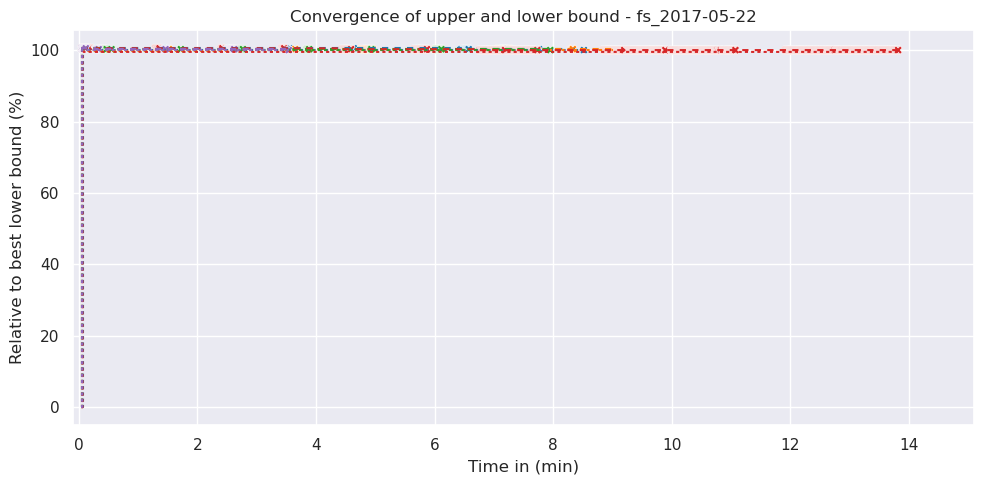

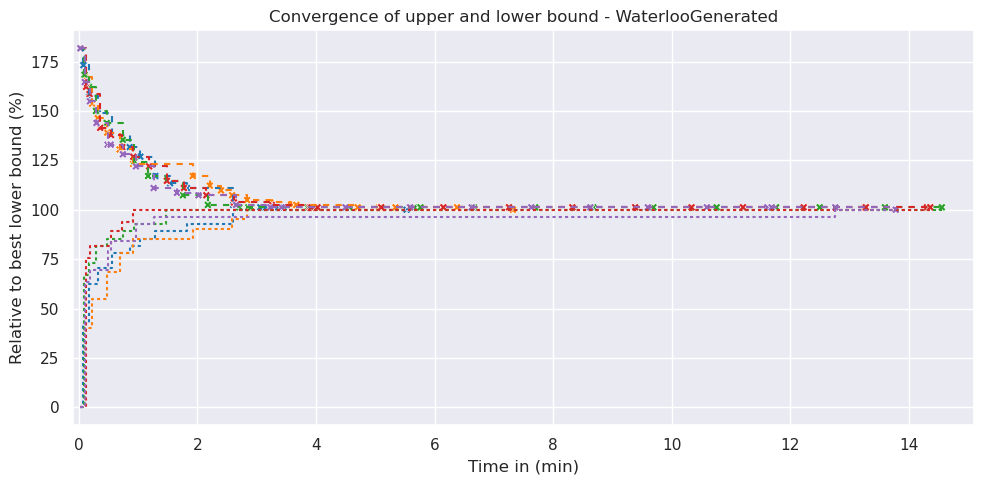

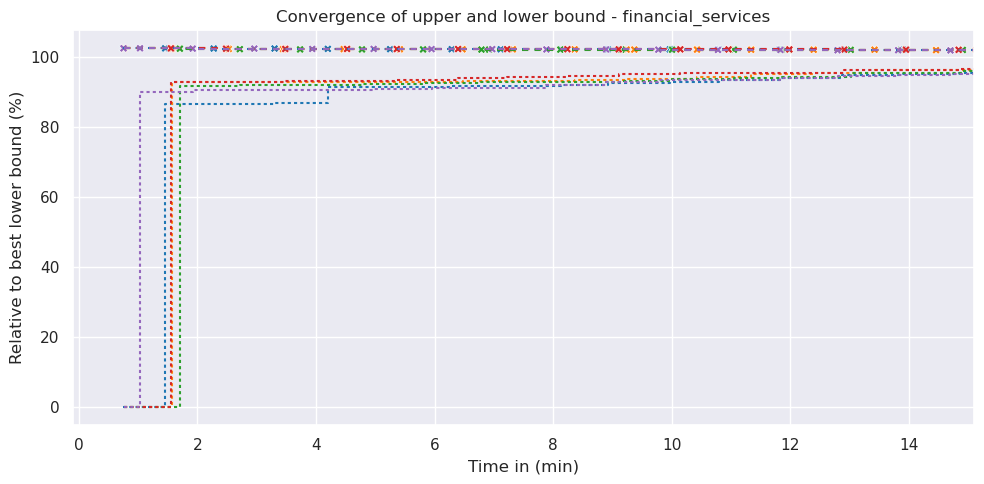

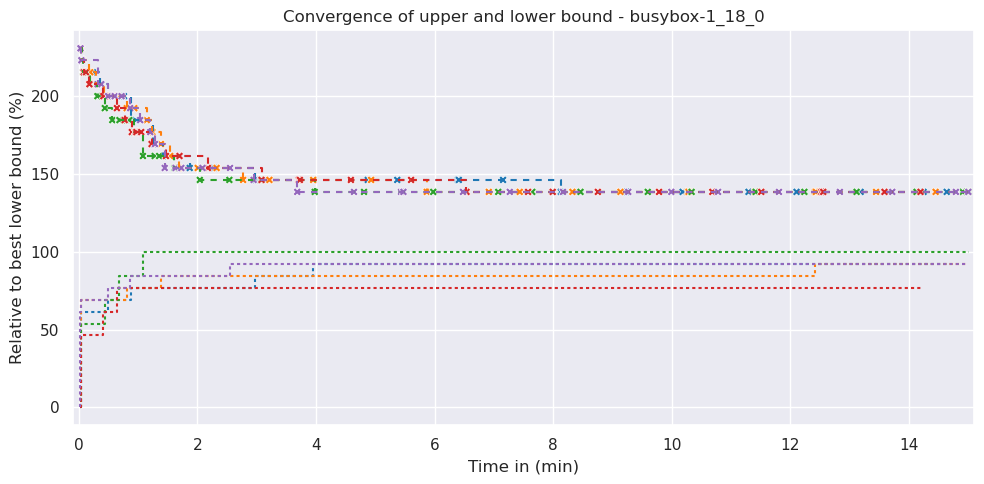

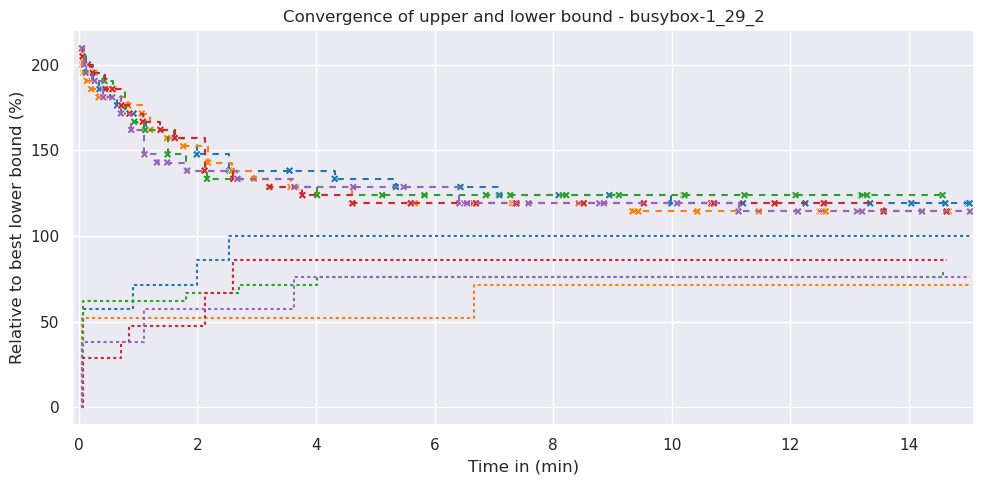

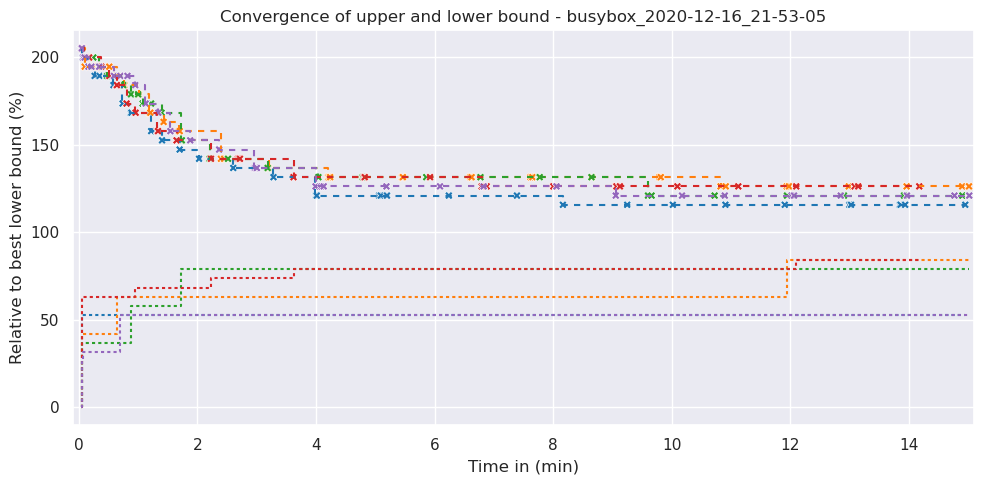

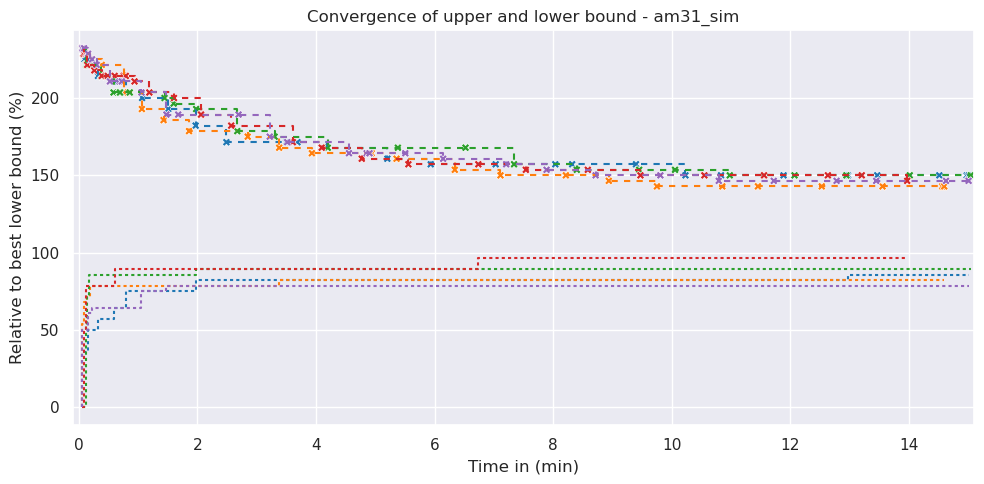

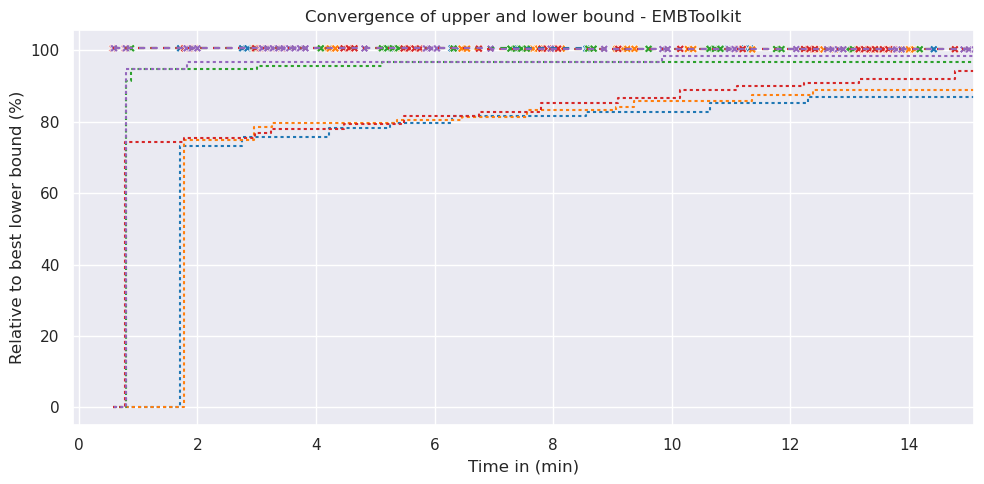

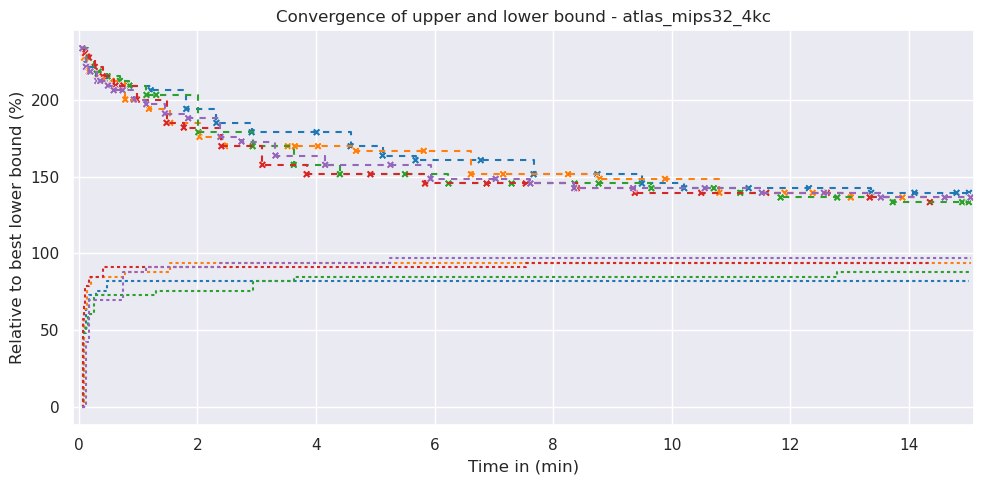

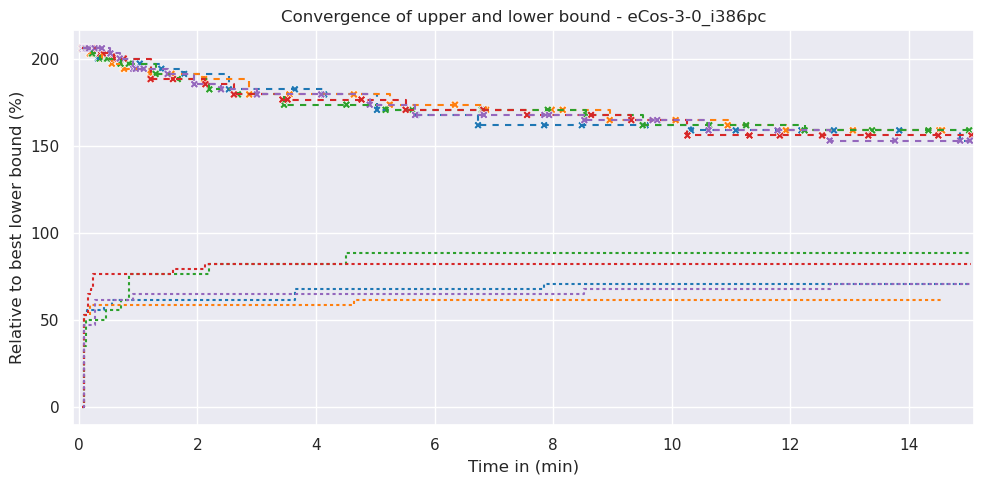

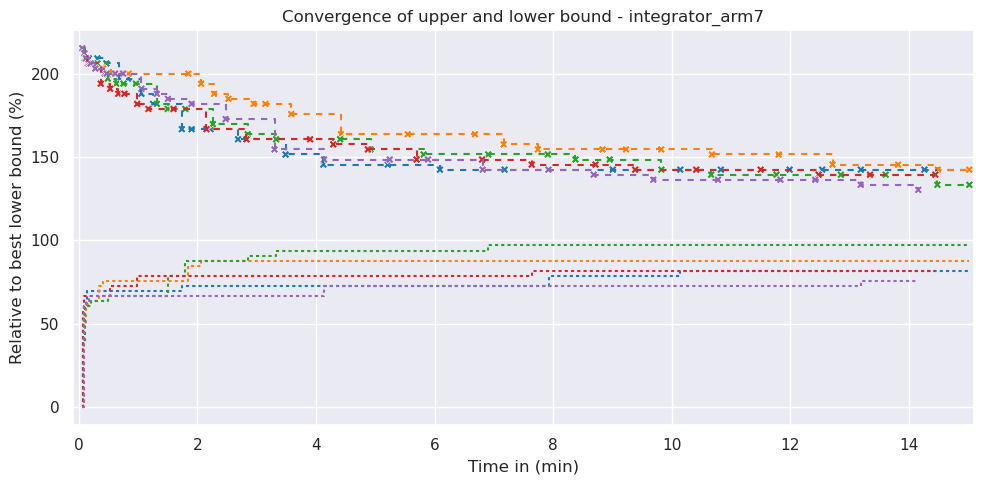

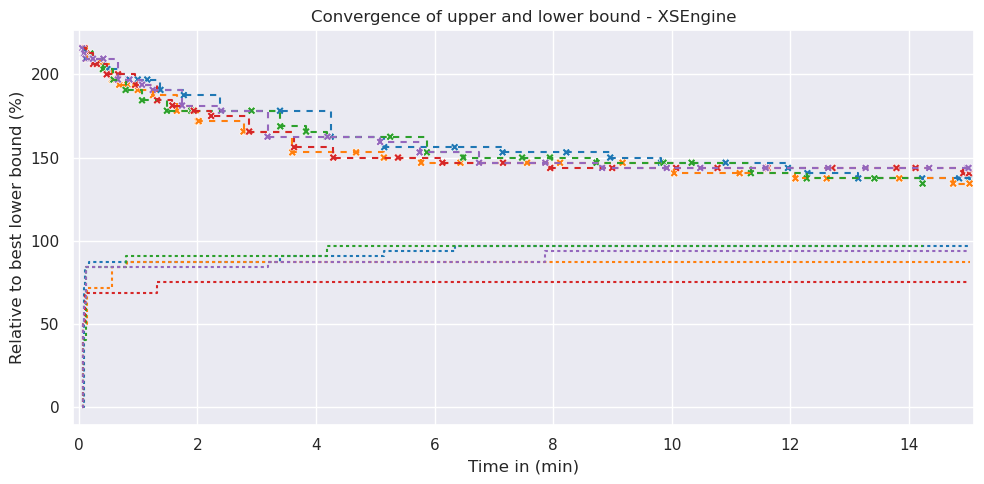

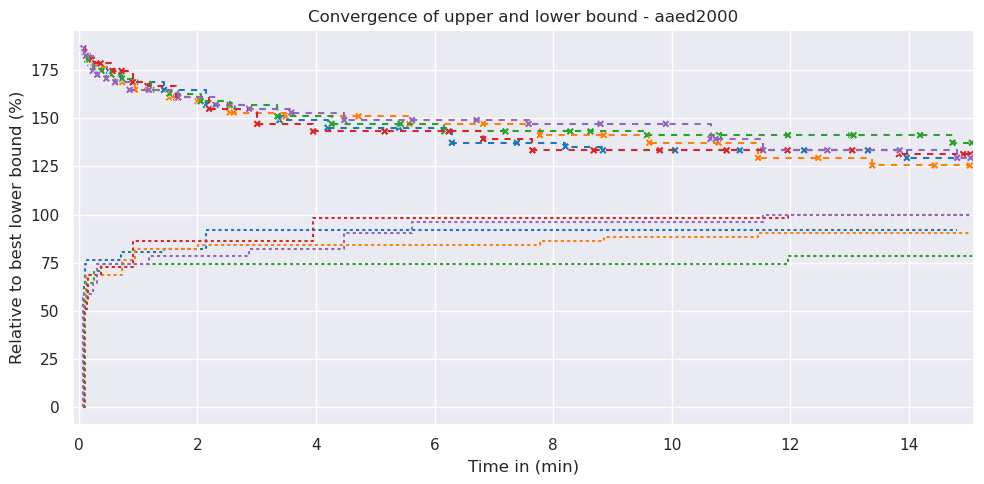

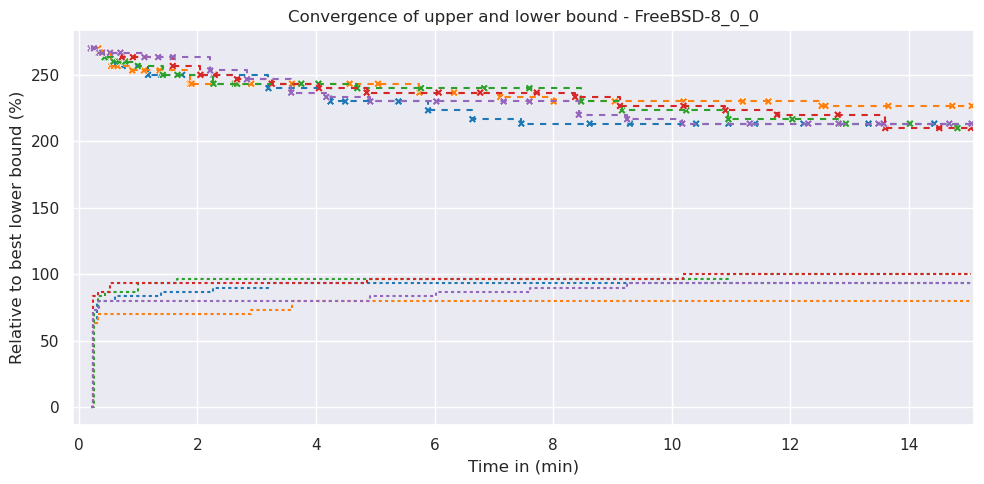

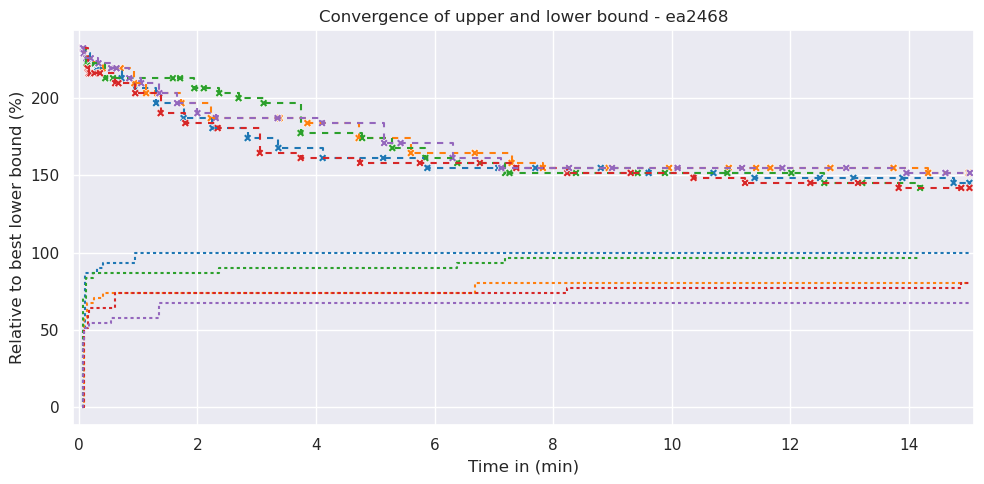

In [13]:
for i in range(1, len(solved_instances), 1):
    plt.figure(figsize=(10, 5))
    plot_lb_ub_progress(
        t[t["instance"].isin(solved_instances[i : i + 1])],
        plt.gca(),
        xmax=15.1,
        single_instance=True,
    )
    plt.tight_layout()
    plt.show()

## Looking onto a selection of instances in a single plot

In [14]:
ec = EventCollector()
selection = [
    "PPU",
    # small, optimal initial sample, no improvement, reached lower bound, progress within seconds + largest system for which an existing sampling algorithm is optimal
    "axTLS",
    # small, bad initial sample, large improvement, tight lower bound, progress for 0/1 min + smallest system that we cannot optimally solve
    "berkeleyDB2",
    # small, bad initial sample, large improvement, reached lower bound, progress for 6/3 min + one of the most significant improvements (43% + optimal afterwards)
    "fs_2017-05-22",
    # medium, good initial sample, small improvement, tight lower bound, progress for 0/10 min + smallest improvement (near-optimal sample still improved)
    "busybox_2020-12-16_21-53-05",
    # medium, bad initial sample, improvement over ~6 minutes, quick progress on lb.
    "FreeBSD-8_0_0"
    # medium, bad initial sample, large improvement, far lower bound, progress for 15/15 min + system with the largest remaining gap between LB=30 and sample=59 (almost 100%)
]
data[data["instance_name"].isin(selection)].drop_duplicates(subset=["instance_name"]).sort_values(
    by=["num_vars", "num_clauses"]
).apply(ec, axis=1)
t_selected = pd.DataFrame(ec.events)
t_selected["instance"] = t_selected["instance"].apply(lambda s: s[:15])

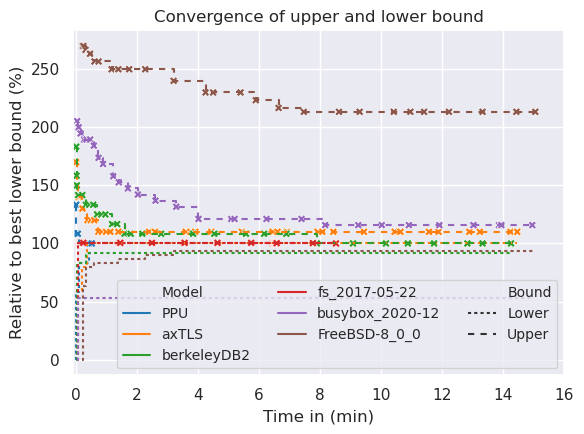

In [15]:
plt.figure(figsize=(6, 4.5))
plot_lb_ub_progress(t_selected, plt.gca(), xmax=16)
plt.legend(ncols=3, loc="lower right", prop={"size": 10})
plt.tight_layout()
plt.savefig("./plots/01_12_convergence_of_selected_models.pdf")
plt.show()

## Time of last change

To get a better grasp of the necessary time.

In [16]:
time_until_last_change = (
    t[t["final"] & (t["instance"].isin(solved_instances))]
    .groupby(["instance", "path", "type"])[["time"]]
    .min()
    .reset_index()
    .groupby(["instance", "type"])[["time"]]
    .mean()
)
time_until_last_change

time
instance                   type           
APL                        Lower  0.136439
                           Upper  0.040357
APL-Model                  Lower  1.771934
                           Upper  0.298849
BankingSoftware            Lower  0.335227
...                                    ...
toybox_2020-12-06_00-02-46 Upper  1.640670
uclibc_2008-06-05_13-46-47 Lower  9.421597
                           Upper  1.650068
uclibc_2020-12-24_11-54-53 Lower  4.801036
                           Upper  0.553816

[92 rows x 1 columns]

In [17]:
(time_until_last_change.groupby("instance")[["time"]].max() < 3).sum()

time    19
dtype: int64

In [18]:
time_until_last_change.reset_index().groupby("type")[["time"]].mean()

time
type           
Lower  3.630550
Upper  5.235614